# Signal Processing I (Fourier Series)
Author: Chul Min Yeum  
Email: cmyeum@uwaterloo.ca  

Last updated: 2023-10-01

## Table of Contents
* Perioidc Signals
* Numeric Integration
* Square Wave (General form)
* Square Wave (Complex Form)

## Periodic Signals

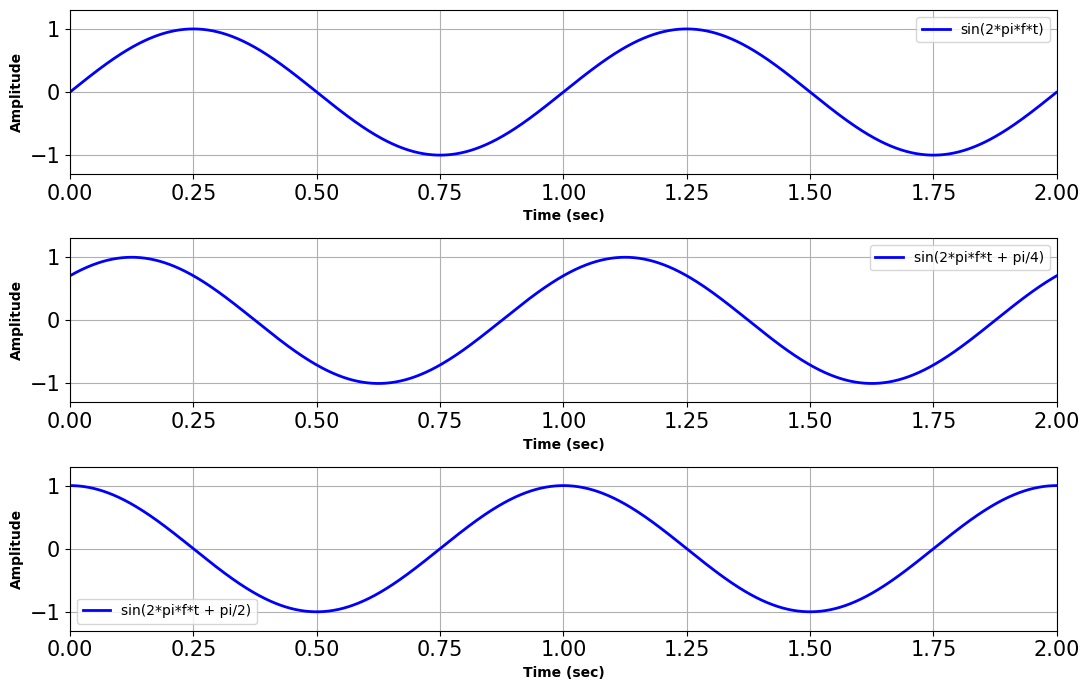

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym


# Creationg of symbolic since curves
f = 1 # frequency

ts = sym.symbols('t') # time
pis = sym.pi

y1s = sym.sin(2*pis*f*ts) # no phase
y2s = sym.sin(2*pis*f*ts + pis/4) # adding pi/4 phase shift
y3s = sym.sin(2*pis*f*ts + pis/2) # adding pi/2 phase shift

# Create analog signal (assuming that high sampling rate)

ncycle = 2 # num. of cycles
fs = 1000 # num. of samples per a second
ta = np.arange(0, ncycle*f,  1/fs)

# Symbolic signals to time signals
y1 = sym.lambdify(ts, y1s,"numpy")(ta)
y2 = sym.lambdify(ts, y2s,"numpy")(ta)
y3 = sym.lambdify(ts, y3s,"numpy")(ta)

# Plot the signals
fig, axs = plt.subplots(3, 1, figsize=(11, 7))

# y1 plot
axs[0].plot(ta, y1, '-b', linewidth=2)
axs[0].legend(['sin(2*pi*f*t)'])
axs[0].axis('tight'); axs[0].grid(True)
axs[0].set_ylabel('Amplitude', fontweight='bold')
axs[0].set_ylim([-1.3, 1.3])
axs[0].set_xlim([0, ncycle*f])
axs[0].set_xlabel('Time (sec)', fontweight='bold')
axs[0].tick_params(labelsize=15)

# y2 plot
axs[1].plot(ta, y2, '-b', linewidth=2)
axs[1].legend(['sin(2*pi*f*t + pi/4)'])
axs[1].axis('tight'); axs[1].grid(True)
axs[1].set_ylabel('Amplitude', fontweight='bold')
axs[1].set_ylim([-1.3, 1.3]); axs[1].set_xlim([0, ncycle*f])
axs[1].set_xlabel('Time (sec)', fontweight='bold')
axs[1].tick_params(labelsize=15)

# y3 plot
axs[2].plot(ta, y3, '-b', linewidth=2)
axs[2].legend(['sin(2*pi*f*t + pi/2)'])
axs[2].axis('tight'); axs[2].grid(True)
axs[2].set_ylabel('Amplitude', fontweight='bold')
axs[2].set_ylim([-1.3, 1.3]); axs[2].set_xlim([0, ncycle*f])
axs[2].set_xlabel('Time (sec)', fontweight='bold')
axs[2].tick_params(labelsize=15)

plt.tight_layout()
plt.show()


## Numeric Integration

How to do definite integral of f(x) from 0 to 3? 

$f(x) = x^3  - 6x $

**Analytical solution**  
If you know the closed form of the integral, you can directly compute the answer like  

$\int_0^3 f(x) d x=\frac{1}{4} x^4-\left.3 x^2\right|_0 ^3=\frac{81}{4}-27=-\frac{27}{4}$

**Numerical solution**  
If the closed-form solution doesn't exist, a numerical method might be your option.   
The areas under the graph are segmented using rectangular bars, and these areas are then summed.  

In [2]:
def fx(x):
    return x**3 - 6*x

n = 10000  
a = 0
b = 3
dx = (b-a) / n # very narrow width

area_fx_num = 0

for ii in range(n):
    x_star = a + dx* ii
    area_fx_num += fx(x_star) * dx

area_fx_analy = -27/4
error_est = abs(area_fx_num - area_fx_analy)

print('The error of the numeric integration is ' + str(error_est))

The error of the numeric integration is 0.0013497975000120732


## Square Wave (General form)

Periodic square wave equation in a Fourier series form  

$x\left(t\right)=\frac{a_0 }{2}+\sum_{n=0}^{\infty } a_n \cos \left(\frac{2\pi \mathrm{nt}}{T_p }\right)+b_n \sin \left(\frac{2\pi \mathrm{nt}}{T_p }\right)$

$a_0 = 0$  
$a_n =  0$  
$b_n = \frac{2}{n\pi}(1-\cos (n \pi))$  

The analytic form of the Fourier series  
$x(t)=\sum_{n=1}^{\infty} \frac{2}{n \pi}(1-\cos n \pi) * \sin \left(\frac{2 \pi n t}{T_p}\right)=\sum_{n=1}^{\infty} x_n(t)$



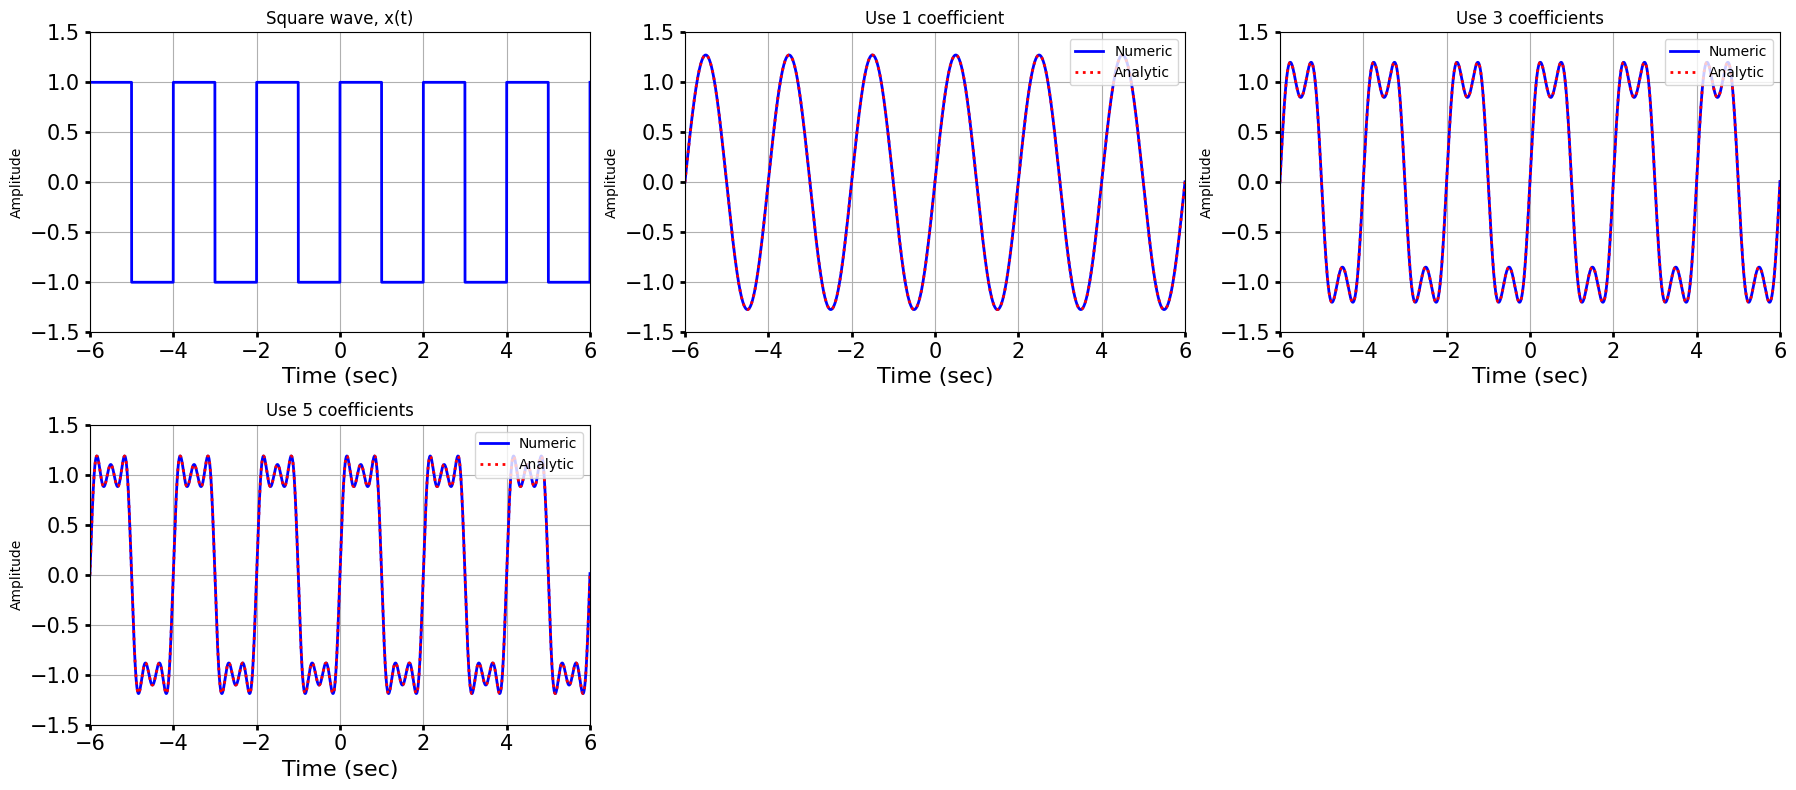

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


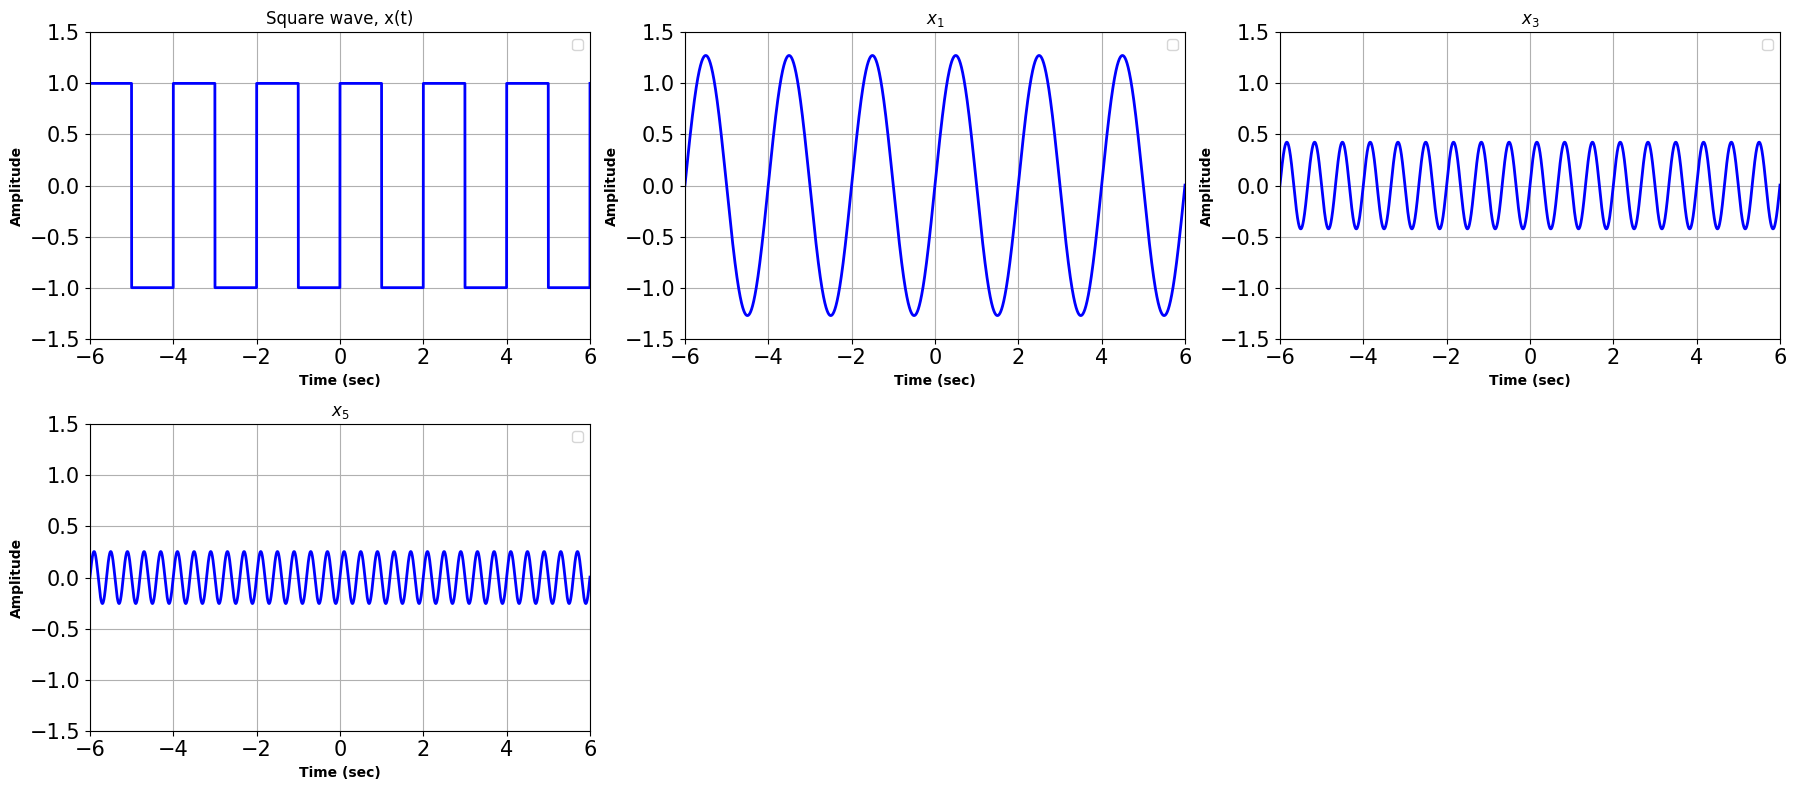

In [22]:
import numpy as np
from scipy.integrate import quad
from scipy.signal import square

import matplotlib.pyplot as plt

# Generate an analogue signal 
ncyle = 3
Fsa = 1000 # sampling frequency (assumed to be infinite)
Tp = 2
t = np.arange(-ncyle*Tp, ncyle*Tp + 1/Fsa, 1/Fsa) 

# Make a square wave function 
x = lambda t: square(t*(2*np.pi)/Tp) 


# Fourier series reconstruction using Fourier Series

nCoeff = 5 # let's only compute five coefficients

# Analytic solution
# Assume that we know analytic solutions of an and bn (see above equations)
xn = np.zeros((nCoeff, len(t)))
for ii in range(nCoeff):
    xn[ii] = 2/(np.pi*(ii+1)) * (1-np.cos(np.pi*(ii+1))) * np.sin(2*np.pi*(ii+1)*t/Tp)
    
sig_y_analytic = np.cumsum(xn, axis=0)

# Numeric solution
# Assuem that an and bn should be computed from the equations of Fourier series 

# Compute Fourier coefficients 
# Compute a0 
a0 = 1/Tp * quad(x, -Tp/2, Tp/2)[0]

# Compute an and bn
a = np.zeros(nCoeff)
b = np.zeros(nCoeff)
for ii in range(nCoeff):
    fun_a = lambda t: x(t) * np.cos(2*np.pi*(ii+1)*t/Tp)
    a[ii] = 2/Tp * quad(fun_a, -Tp/2, Tp/2)[0]
    
    fun_b = lambda t: x(t) * np.sin(2*np.pi*(ii+1)*t/Tp)
    b[ii] = 2/Tp * quad(fun_b, -Tp/2, Tp/2)[0]

# Numerical integration
sig_y_numeric = np.zeros((nCoeff, len(t)))
for ii in range(nCoeff):
    if ii == 0:
        sig_y_numeric[ii] = a0/2 + a[ii]*np.cos(2*np.pi*(ii+1)*t/Tp) + b[ii]*np.sin(2*np.pi*(ii+1)*t/Tp)
    else:
        sig_y_numeric[ii] = sig_y_numeric[ii-1] + a[ii]*np.cos(2*np.pi*(ii+1)*t/Tp) + b[ii]*np.sin(2*np.pi*(ii+1)*t/Tp)


# Plot the signals (general form)
fig, axs = plt.subplots(2, 3, figsize=(18, 8))

fig.delaxes(axs[1][1])
fig.delaxes(axs[1][2])

# Plot x(t)
axs[0, 0].plot(t, x(t), '-b', linewidth=2)
axs[0, 0].axis('tight')
axs[0, 0].grid(True)
axs[0, 0].set_title('Square wave, x(t)')
axs[0, 0].set_ylabel('Amplitude')
axs[0, 0].set_ylim([-1.5, 1.5])
axs[0, 0].set_xlabel('Time (sec)', fontsize=16)
axs[0, 0].tick_params(labelsize=15, width=2)
axs[0, 0].autoscale(enable=True, axis='x', tight=True)

# Use 1 coefficient
axs[0, 1].plot(t, sig_y_numeric[0], '-b', linewidth=2, label='Numeric')
axs[0, 1].plot(t, sig_y_analytic[0], ':r', linewidth=2, label='Analytic')
axs[0, 1].axis('tight')
axs[0, 1].grid(True)
axs[0, 1].set_title('Use 1 coefficient')
axs[0, 1].set_ylabel('Amplitude')
axs[0, 1].set_ylim([-1.5, 1.5])
axs[0, 1].set_xlabel('Time (sec)', fontsize=16)
axs[0, 1].legend(loc = 1)
axs[0, 1].tick_params(labelsize=15, width=2)
axs[0, 1].autoscale(enable=True, axis='x', tight=True)

# Use 3 coefficients
axs[0, 2].plot(t, sig_y_numeric[2], '-b', linewidth=2, label='Numeric')
axs[0, 2].plot(t, sig_y_analytic[2], ':r', linewidth=2, label='Analytic')
axs[0, 2].axis('tight')
axs[0, 2].grid(True)
axs[0, 2].set_title('Use 3 coefficients')
axs[0, 2].set_ylabel('Amplitude')
axs[0, 2].set_ylim([-1.5, 1.5])
axs[0, 2].set_xlabel('Time (sec)', fontsize=16)
axs[0, 2].legend(loc = 1)
axs[0, 2].tick_params(labelsize=15, width=2)
axs[0, 2].autoscale(enable=True, axis='x', tight=True)

# Use nCoeff coefficients
axs[1, 0].plot(t, sig_y_numeric[4], '-b', linewidth=2, label='Numeric')
axs[1, 0].plot(t, sig_y_analytic[4], ':r', linewidth=2, label='Analytic')
axs[1, 0].axis('tight')
axs[1, 0].grid(True)
axs[1, 0].set_title(f'Use {nCoeff} coefficients')
axs[1, 0].set_ylabel('Amplitude')
axs[1, 0].set_ylim([-1.5, 1.5])
axs[1, 0].set_xlabel('Time (sec)', fontsize=16)
axs[1, 0].legend(loc = 1)
axs[1, 0].tick_params(labelsize=15, width=2)
axs[1, 0].autoscale(enable=True, axis='x', tight=True)

plt.tight_layout()
plt.show()

# Plot the signals (decomposition)
fig, axs = plt.subplots(2, 3, figsize=(18, 8))

fig.delaxes(axs[1][1])
fig.delaxes(axs[1][2])

# x(t)
axs[0, 0].plot(t, x(t), '-b', linewidth=2)
axs[0, 0].grid(True)
axs[0, 0].set_title('Square wave, x(t)')
axs[0, 0].set_ylabel('Amplitude', fontweight='bold')
axs[0, 0].set_ylim([-1.5, 1.5])
axs[0, 0].set_xlabel('Time (sec)', fontweight='bold')
axs[0, 0].tick_params(axis='both', which='major', labelsize=15)
axs[0, 0].autoscale(enable=True, axis='x', tight=True)

# x1(t)
axs[0, 1].plot(t, xn[0], 'b', linewidth=2)
axs[0, 1].grid(True)
axs[0, 1].set_title(r"$x_1$")
axs[0, 1].set_ylabel('Amplitude', fontweight='bold')
axs[0, 1].set_ylim([-1.5, 1.5])
axs[0, 1].set_xlabel('Time (sec)', fontweight='bold')
axs[0, 1].tick_params(axis='both', which='major', labelsize=15)
axs[0, 1].autoscale(enable=True, axis='x', tight=True)

# x3(t)
axs[0, 2].plot(t, xn[2], 'b', linewidth=2)
axs[0, 2].grid(True)
axs[0, 2].set_title(r"$x_3$")
axs[0, 2].set_ylabel('Amplitude', fontweight='bold')
axs[0, 2].set_ylim([-1.5, 1.5])
axs[0, 2].set_xlabel('Time (sec)', fontweight='bold')
axs[0, 2].tick_params(axis='both', which='major', labelsize=15)
axs[0, 2].autoscale(enable=True, axis='x', tight=True)

# x5(t)
axs[1, 0].plot(t, xn[4], 'b', linewidth=2)
axs[1, 0].grid(True)
axs[1, 0].set_title(r"$x_5$")
axs[1, 0].set_ylabel('Amplitude', fontweight='bold')
axs[1, 0].set_ylim([-1.5, 1.5])
axs[1, 0].set_xlabel('Time (sec)', fontweight='bold')
axs[1, 0].tick_params(axis='both', which='major', labelsize=15)
axs[1, 0].autoscale(enable=True, axis='x', tight=True)

plt.tight_layout()
plt.show()


# Square Wave (Complex Form)

Let's use the complex form of the Fourier series

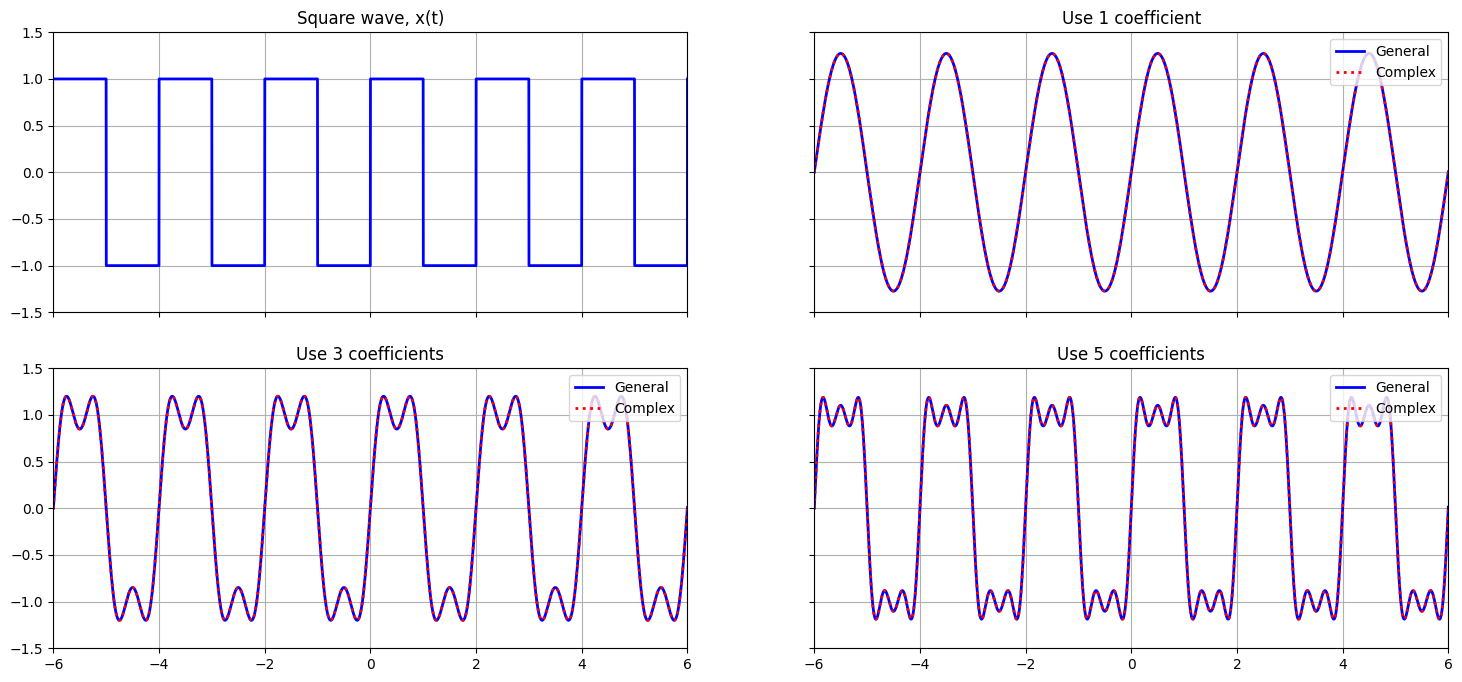

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import square
from scipy.integrate import quad

# Parameters and setup
ncyle = 3
Fsa = 1000
Tp = 2
t = np.arange(-ncyle*Tp, ncyle*Tp + 1/Fsa, 1/Fsa)
x = lambda t: square(t*(2*np.pi)/Tp) 

# General form
a0 = quad(x, -Tp/2, Tp/2)[0]
nCoeff = 5
a = np.zeros(nCoeff)
b = np.zeros(nCoeff)
sig_y_general = np.zeros((nCoeff, len(t)))

for ii in range(1, nCoeff+1):
    fun_a = lambda t: x(t) * np.cos(2 * np.pi * ii * t / Tp)
    a[ii-1] = quad(fun_a, -Tp/2, Tp/2)[0]
    
    fun_b = lambda t: x(t) * np.sin(2 * np.pi * ii * t / Tp)
    b[ii-1] = quad(fun_b, -Tp/2, Tp/2)[0]
    
    if ii == 1:
        sig_y_general[ii-1,:] = a0 + a[ii-1] * np.cos(2 * np.pi * ii * t / Tp) + b[ii-1] * np.sin(2 * np.pi * ii * t / Tp)
    else:
        sig_y_general[ii-1,:] = sig_y_general[ii-2,:] + a[ii-1] * np.cos(2 * np.pi * ii * t / Tp) + b[ii-1] * np.sin(2 * np.pi * ii * t / Tp)

# Complex form
sig_y_complex_all = np.zeros((2*nCoeff + 1, len(t)), dtype='complex_')

for ii in range(-nCoeff, nCoeff+1):
    
    # quad function doesn't support complex numbers
    fun_re = lambda t: np.real(x(t) * np.exp(-1j * 2 * np.pi * ii * t / Tp))
    fun_im = lambda t: np.imag(x(t) * np.exp(-1j * 2 * np.pi * ii * t / Tp))

    val_re = quad(fun_re, 0, Tp)[0]
    val_im = quad(fun_im, 0, Tp)[0]
    val = val_re + 1j*val_im

    sig_y_complex_all[ii+nCoeff,:] = 1/Tp * val * np.exp(1j * 2 * np.pi * ii * t / Tp)

sig_y_complex = np.zeros((nCoeff, len(t)), dtype='complex_')
for ii in range(1, nCoeff+1):
    rowId = list(range(nCoeff-ii, nCoeff+ii+1))
    
    sig_y_complex[ii-1,:] = np.sum(sig_y_complex_all[rowId,:], axis=0)

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(18,8))
axs[0, 0].plot(t, x(t), '-b', linewidth=2)
axs[0, 0].set_title('Square wave, x(t)')
axs[0, 0].set_ylim([-1.5, 1.5])
axs[0, 0].grid(True)
axs[0, 0].autoscale(enable=True, axis='x', tight=True)

axs[0, 1].plot(t, sig_y_general[0,:], '-b', linewidth=2)
axs[0, 1].plot(t, np.real(sig_y_complex[0,:]), ':r', linewidth=2)
axs[0, 1].set_title('Use 1 coefficient')
axs[0, 1].set_ylim([-1.5, 1.5])
axs[0, 1].legend(['General', 'Complex'], loc=1)
axs[0, 1].grid(True)
axs[0, 1].autoscale(enable=True, axis='x', tight=True)

axs[1, 0].plot(t, sig_y_general[2,:], '-b', linewidth=2)
axs[1, 0].plot(t, np.real(sig_y_complex[2,:]), ':r', linewidth=2)
axs[1, 0].set_title('Use 3 coefficients')
axs[1, 0].set_ylim([-1.5, 1.5])
axs[1, 0].legend(['General', 'Complex'], loc=1)
axs[1, 0].grid(True)
axs[1, 0].autoscale(enable=True, axis='x', tight=True)

axs[1, 1].plot(t, sig_y_general[4,:], '-b', linewidth=2)
axs[1, 1].plot(t, np.real(sig_y_complex[4,:]), ':r', linewidth=2)
axs[1, 1].set_title('Use 5 coefficients')
axs[1, 1].set_ylim([-1.5, 1.5])
axs[1, 1].legend(['General', 'Complex'], loc=1)
axs[1, 1].grid(True)
axs[1, 1].autoscale(enable=True, axis='x', tight=True)

for ax in axs.flat:
    ax.label_outer()

plt.show()
